In [3]:
import os, shutil
import numpy as np 
import pandas as pd 
import cv2

pokemons = 'C:/Users/Thiago/Downloads/pokemon/pokemon'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


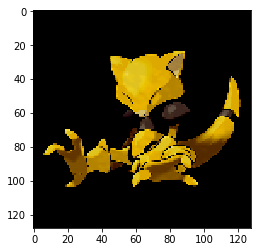

In [4]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image

def convert_to_jpg(img_path):
    img = Image.open(img_path)
    if img.mode == 'RGBA':
        img.load()
        background = Image.new("RGB", img.size, (0,0,0))
        background.paste(img, mask=img.split()[3])
        img = np.array(background)
    else:
        img = img.convert('RGB')
        img = np.array(img)
    
    return img
    img = cv2.resize(img, (128,128))
    return img

def normalize_img(img):
    img = img / 127.5 - 1
    return img

def resize_img(img):
    img = cv2.resize(img, (128,128))
    return img


def open_convert(img_path):
    # png
    if img_path[-4:] == '.png':
        img = convert_to_jpg(img_path)
    # jpeg
    else:
        img = Image.open(img_path)
        img = img.convert('RGB')
        img = np.array(img)

        
    img = resize_img(img)
    img = normalize_img(img)
    
    #Imagem redimencionada para 128x128
    return img
# Test
img = open_convert('C:/Users/Thiago/Downloads/pokemon/pokemon/Abra/00000000.png')
plt.imshow(img)
plt.show()

In [5]:
images = []
labels = []

# Constante de qtde de pokemons
images_per_pokemon = 200

count_dir = os.listdir(pokemons)[:1]

count = 0

for pkmn in count_dir:
    pkmn_dir = os.path.join(pokemons, pkmn)
    
    curr_imgs = 0
    
    for img in sorted(os.listdir(pkmn_dir)):
        # Alimentando o array de imagens e labels (nomes das pastas)
        try:
            images.append(open_convert(os.path.join(pkmn_dir, img)))
            labels.append(pkmn)
        except (ValueError, OSError):
            continue
        count += 1
        
        curr_imgs += 1
        if curr_imgs >= images_per_pokemon:
            break

In [8]:
labels

['Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 'Abra',
 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


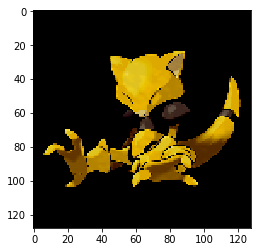

In [7]:
#Exemplo de imagem normalizada
plt.imshow(images[0])
plt.show()

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, AveragePooling2D, Reshape, Input
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

input_shape = (images[0].shape)

latent_dim = 100


# Gerador de imagens
def make_gen():
    Gen = Sequential()

    Gen.add(Dense(256, input_dim=latent_dim))
    Gen.add(LeakyReLU(alpha=0.2))
    Gen.add(BatchNormalization(momentum=0.8))
    Gen.add(Dense(512))
    Gen.add(LeakyReLU(alpha=0.2))
    Gen.add(BatchNormalization(momentum=0.8))
    Gen.add(Dense(1024))
    Gen.add(LeakyReLU(alpha=0.2))
    Gen.add(BatchNormalization(momentum=0.8))
    Gen.add(Dense(np.prod(input_shape), activation='tanh'))
    Gen.add(Reshape(input_shape))

    Gen.summary()
    
    noise = Input(shape=(latent_dim,))
    img = Gen(noise)
    
    return Model(noise, img)
    
# Discriminador
def make_discr():
    Discr = Sequential()

    Discr.add(Conv2D(128, (3, 3), strides=(2, 2), input_shape=input_shape))
    Discr.add(LeakyReLU(alpha=0.2))
    Discr.add(AveragePooling2D(pool_size = (4, 4)))
    Discr.add(Flatten())
    Discr.add(Dense(units=512, activation='relu'))
    Discr.add(Dense(units=1, activation='sigmoid'))
    Discr.summary()
    
    img = Input(shape=input_shape)
    validity = Discr(img)
    
    return Model(img, validity)

C:\Users\Thiago\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

SystemError: <class '_frozen_importlib._ModuleLockManager'> returned a result with an error set

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [8]:
optimizer = Adam(0.0002, 0.5)

Discr = make_discr()
Discr.compile(loss='binary_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

Gen = make_gen()

z = Input(shape=(latent_dim,))
img = Gen(z)

Discr.trainable = False

validity = Discr(img)

Combined = Model(z, validity)
Combined.compile(loss='binary_crossentropy', optimizer=optimizer)

batch_size = 128

epochs = 200

sample_interval = 20

valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
#     noise = np.random.randn(r*c, 128, 128, 3)

    gen_imgs = Gen.predict(noise)
    
    gen_imgs = 0.5 * gen_imgs + 0.5
    
    
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,:])
            axs[i,j].axis('off')
            cnt += 1
    plt.show()
    
def sample_big_images(epoch):
    noise = np.random.normal(0, 1, (5, latent_dim))
    
    gen_imgs = Gen.predict(noise)
    
    gen_imgs = 0.5 * gen_imgs + 0.5
    
    # Mostra 5 imagens
    for i in range(5):
        plt.imshow(gen_imgs[i, :, :, :])
        plt.show()


for epoch in range(epochs):
    idx = np.random.randint(0, len(images), batch_size)
    imgs = np.array([images[j] for j in idx])
    
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    
    gen_imgs = Gen.predict(noise)
    
    d_loss_real = Discr.train_on_batch(imgs, valid)
    d_loss_fake = Discr.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    g_loss = Combined.train_on_batch(noise, valid)
    
    if epoch % sample_interval == 0:
        print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
        sample_images(epoch)
        sample_big_images(epoch)
    

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 63, 63, 128)       3584      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 63, 63, 128)       0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 15, 15, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               14746112  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 14,750,209
Trainable params: 14,750,209
Non-trainable pa

C:\Users\rafae\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


ResourceExhaustedError: OOM when allocating tensor with shape[28800,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node training/Adam/Variable_2/Assign (defined at C:\Users\rafae\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:402) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'training/Adam/Variable_2/Assign', defined at:
  File "C:\Users\rafae\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\rafae\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\rafae\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\rafae\Anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\rafae\Anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\rafae\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tornado\ioloop.py", line 759, in _run_callback
    ret = callback()
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "C:\Users\rafae\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\rafae\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\rafae\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-ad16714686f9>", line 69, in <module>
    d_loss_real = Discr.train_on_batch(imgs, valid)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\keras\engine\training.py", line 1216, in train_on_batch
    self._make_train_function()
  File "C:\Users\rafae\Anaconda3\lib\site-packages\keras\engine\training.py", line 509, in _make_train_function
    loss=self.total_loss)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\keras\optimizers.py", line 487, in get_updates
    ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "C:\Users\rafae\Anaconda3\lib\site-packages\keras\optimizers.py", line 487, in <listcomp>
    ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "C:\Users\rafae\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 704, in zeros
    return variable(v, dtype=dtype, name=name)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 402, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2495, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 1395, in __init__
    constraint=constraint)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 1547, in _init_from_args
    validate_shape=validate_shape).op
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\ops\state_ops.py", line 223, in assign
    validate_shape=validate_shape)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 67, in assign
    use_locking=use_locking, name=name)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Users\rafae\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[28800,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node training/Adam/Variable_2/Assign (defined at C:\Users\rafae\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:402) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

